# 6.6 Sourcing & Analyzing Time Series Data

## 1. Importing your libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings

In [3]:
warnings.filterwarnings("ignore") 
plt.style.use('fivethirtyeight')

In [5]:
# Configure API key 

quandl.ApiConfig.api_key = 'j_JsaamWNPBCWWs2QceT'

In [7]:
path = r'/Users/test/Desktop/Data Analysis/World Happiness Report'

In [9]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'world_happiness_final.csv'), index_col = False)

In [11]:
df.shape

(782, 12)

In [13]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'GDP per capita', 'Social Support', 'Life Expectancy', 'Freedom',
       'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual',
       'Year'],
      dtype='object')

Since the 'year' column just contains data from 2015 to 2019, we don't need to create subset.

## 2. Time-series analysis: decomposition

In [43]:
missing_values = df.isnull().sum()
print(missing_values)

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
GDP per capita                   0
Social Support                   0
Life Expectancy                  0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64


In [61]:
# Group by year and calculate the average Happiness Score
annual_happiness = df.groupby('Year')['Happiness Score'].mean()

# Ajust Time
decomposition = sm.tsa.seasonal_decompose(annual_happiness, model='additive', period = 1)

In [63]:
print(annual_happiness)

Year
2015    5.375734
2016    5.382185
2017    5.354019
2018    5.375917
2019    5.407096
Name: Happiness Score, dtype: float64


In [65]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

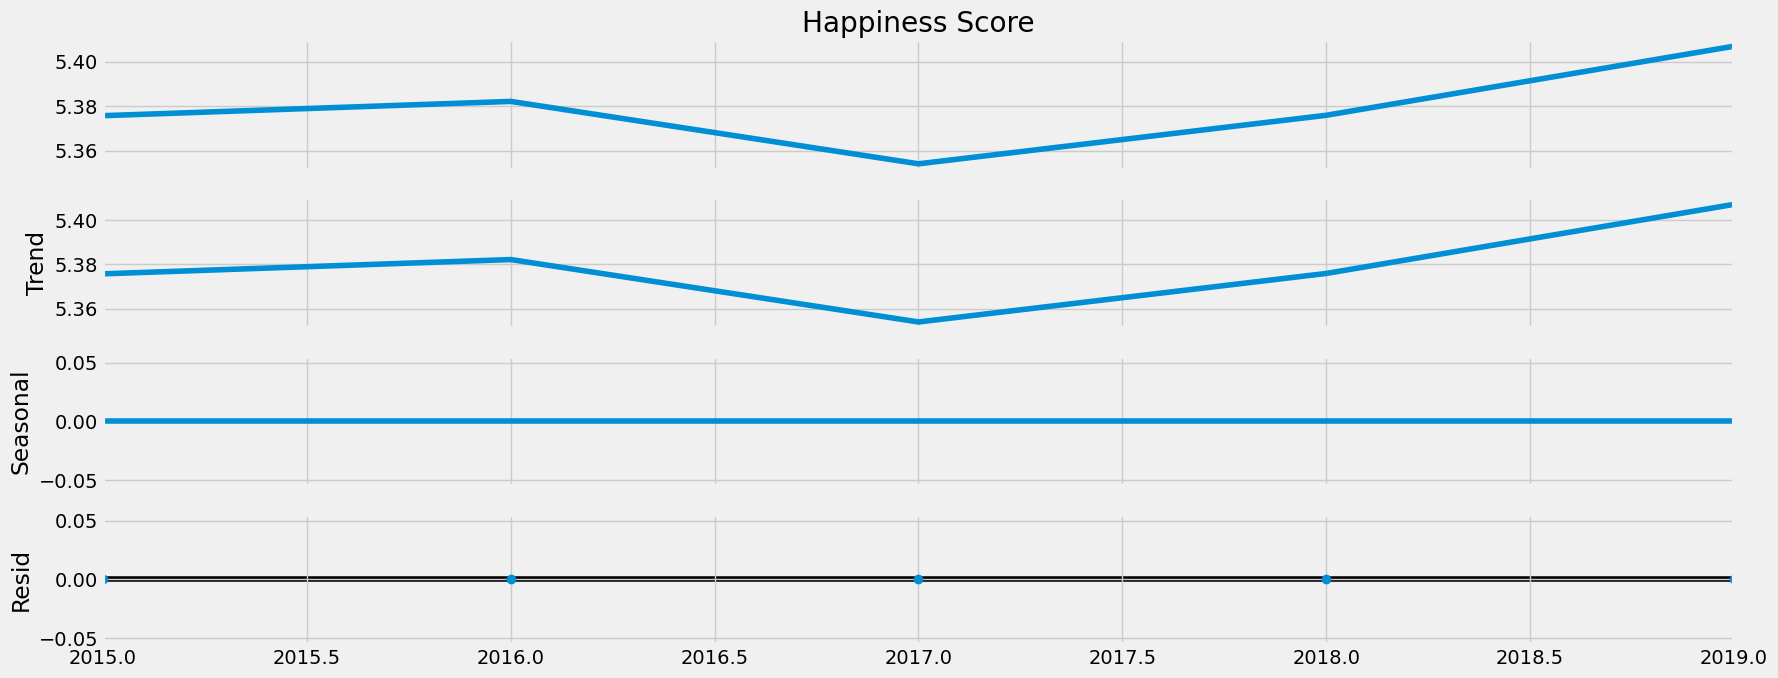

In [67]:
# Plot the separate components

decomposition.plot()
plt.show()

From the decomposition plot:

Trend Line:

It mirrors the slight upward trend observed in the data.
This indicates that the happiness scores are generally increasing over time, though the change is gradual.

Seasonal Line:
The flat seasonal line in this plot indicates no significant seasonal component in the data.
This is expected because the happiness score data is aggregated yearly, meaning there is no recurring intra-year pattern.

Residual Line:
The small, near-zero residual values in this plot suggest that the model captures most of the patterns in the data, with minimal unexplained variation.

## 3. Testing for stationarity

In [82]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(annual_happiness)

Dickey-Fuller Stationarity test:
Test Statistic                -0.937653
p-value                        0.775320
Number of Lags Used            0.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


Interpretation:

The p-value (0.775320) is much higher than 0.05, meaning you fail to reject the null hypothesis. This suggests that the time series is non-stationary.
The test statistic (-0.937653) is greater than all the critical values (e.g., -7.355441 at 1%, -4.474365 at 5%, and -3.126933 at 10%), further supporting that the series is non-stationary.

Having only five years of data is a significant limitation. It requires a much larger dataset to produce meaningful results.

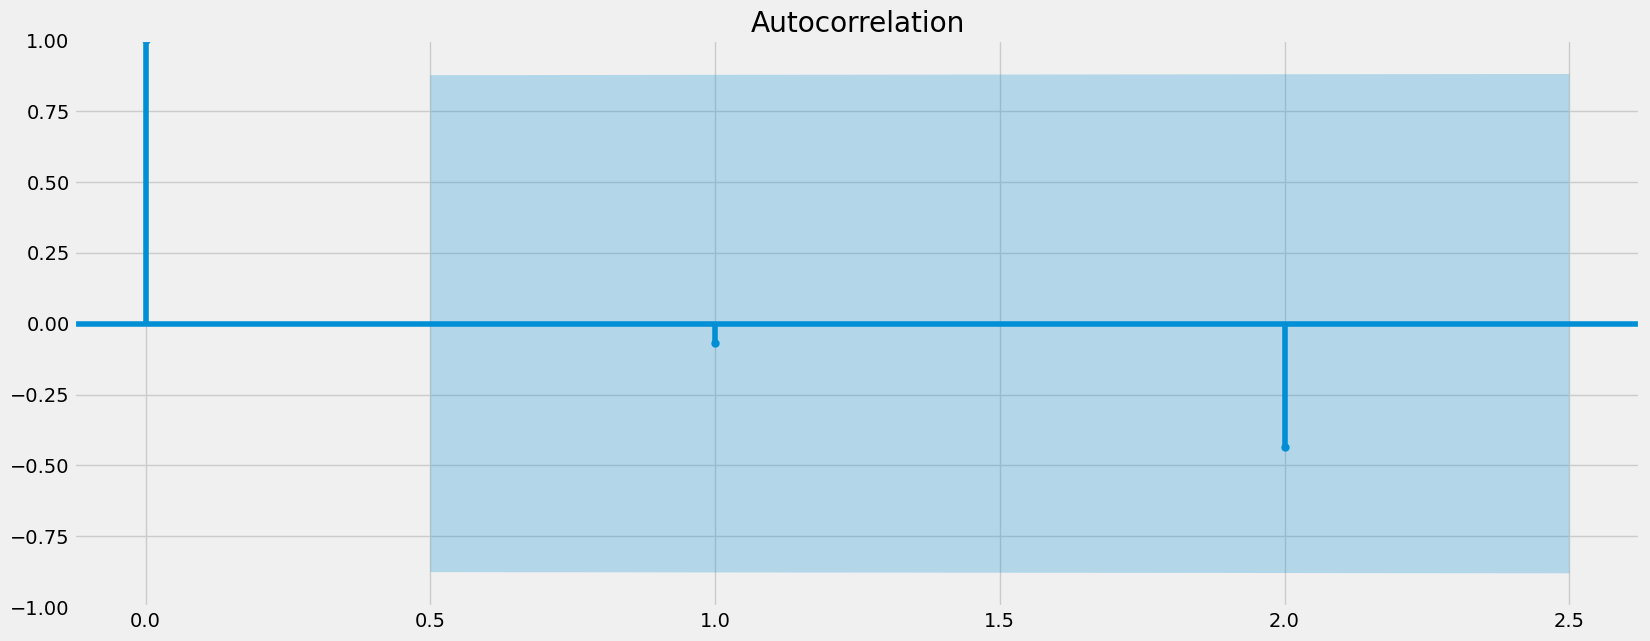

In [85]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(annual_happiness)
plt.show()

## 4. Stationarizing the Data

In [88]:
data_diff = annual_happiness - annual_happiness.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [90]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [92]:
data_diff.head()

Year
2016    0.006451
2017   -0.028165
2018    0.021897
2019    0.031179
Name: Happiness Score, dtype: float64

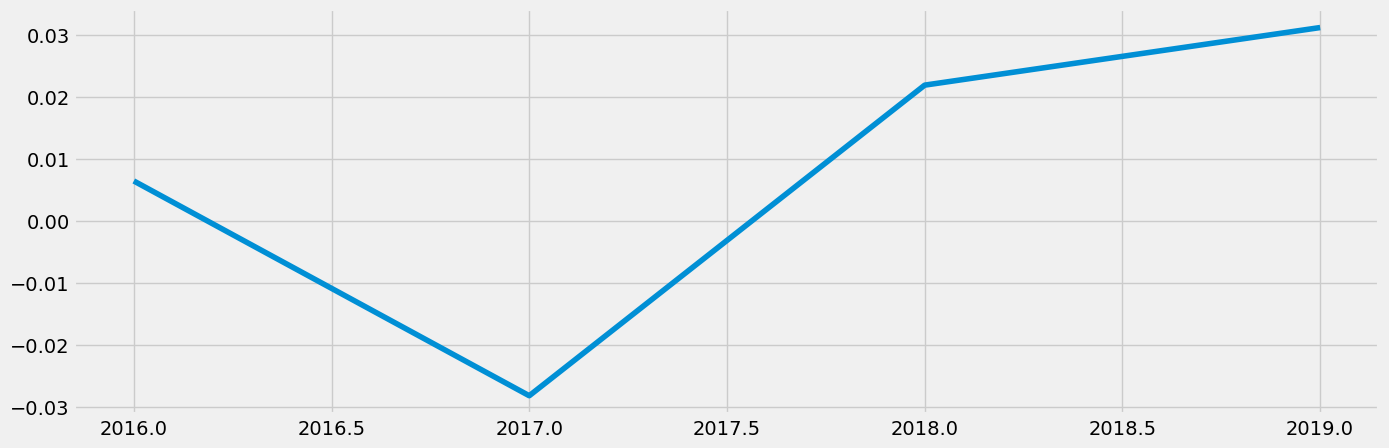

In [98]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [100]:
# Test again
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -0.876918
p-value                         0.795478
Number of Lags Used             0.000000
Number of Observations Used     3.000000
Critical Value (1%)           -10.417191
Critical Value (5%)            -5.778381
Critical Value (10%)           -3.391681
dtype: float64


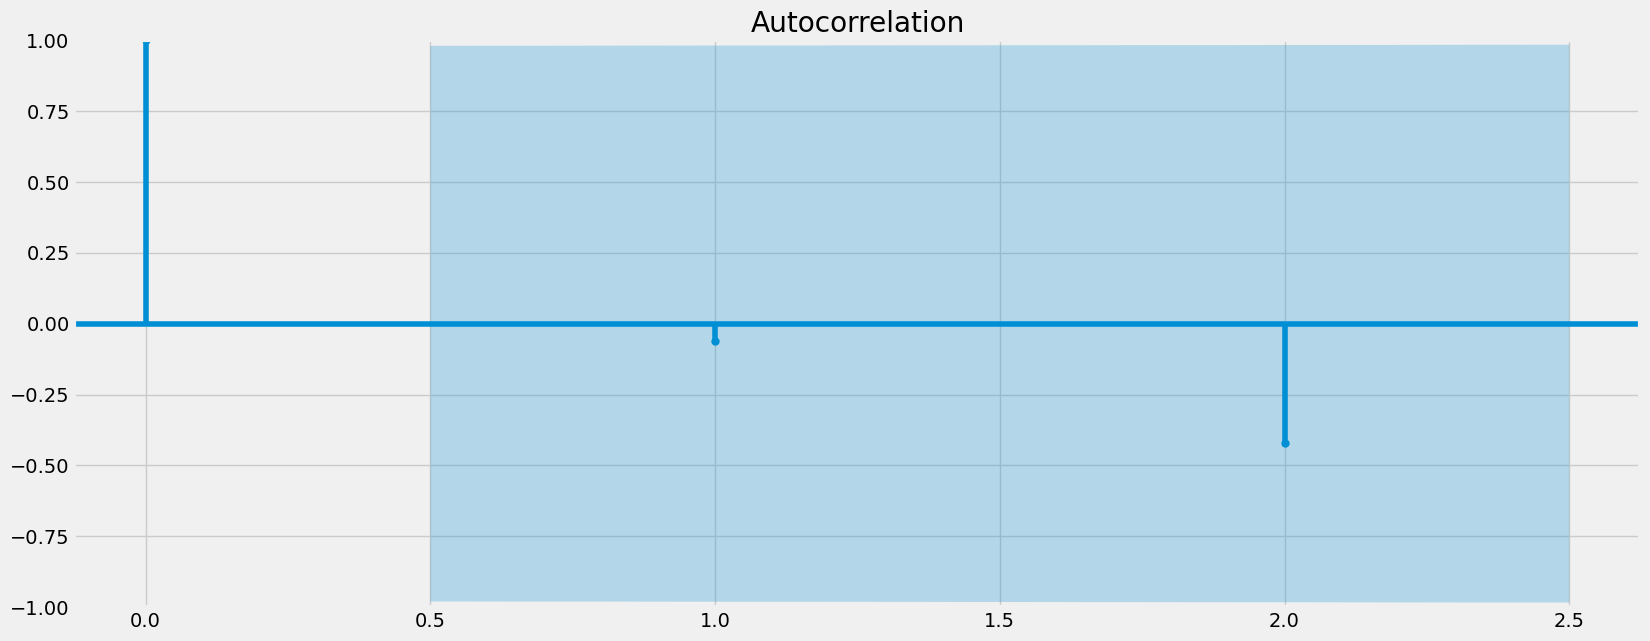

In [102]:
plot_acf(data_diff)
plt.show()

The result won't be better and better. In summary, with only five data points, it's better to focus on exploratory analysis (e.g., averages, trends) and acknowledge the limitations rather than rely on advanced time series techniques.